In [4]:
import pandas as pd
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Load local csv in to dataframe
# DATA USED: Binance Coin data starting from 25th of July 2017
#NOTE: There were missing values in all columns on specific dates
#those values were deleted since it was not possible to find or calculate the values at the time
#of this experiment.

df = pd.read_csv(r'C:\Users\TonyV\Downloads\BNB-USD.csv')

In [5]:
#inspect the data
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/25/2017,0.115203,0.115841,0.101531,0.105870,0.105870,145269
1,7/26/2017,0.105893,0.109013,0.099266,0.105138,0.105138,200395
2,7/27/2017,0.105108,0.108479,0.100888,0.107737,0.107737,344499
3,7/28/2017,0.107632,0.109019,0.101473,0.104067,0.104067,342568
4,7/29/2017,0.104782,0.111264,0.101108,0.107811,0.107811,340218


In [6]:
#Statistical value of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1.481000e+03
mean,59.950437,62.925189,56.922169,60.234108,60.234108,6.566034e+08
std,122.814980,129.303169,116.044598,123.179173,123.179173,1.473544e+09
min,0.099721,0.101211,0.096109,0.099867,0.099867,9.284000e+03
25%,10.126300,10.447901,9.773010,10.119137,10.119137,5.354030e+07
50%,16.447243,16.862385,15.983081,16.463215,16.463215,2.029506e+08
75%,28.377279,29.056501,27.579470,28.393448,28.393448,4.041409e+08
max,676.315918,690.931946,631.465271,675.684082,675.684082,1.798295e+10


In [7]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/25/2017,0.115203,0.115841,0.101531,0.105870,0.105870,145269
1,7/26/2017,0.105893,0.109013,0.099266,0.105138,0.105138,200395
2,7/27/2017,0.105108,0.108479,0.100888,0.107737,0.107737,344499
3,7/28/2017,0.107632,0.109019,0.101473,0.104067,0.104067,342568
4,7/29/2017,0.104782,0.111264,0.101108,0.107811,0.107811,340218
...,...,...,...,...,...,...,...
1476,8/13/2021,386.044067,411.170532,383.216766,410.944885,410.944885,1724229835
1477,8/14/2021,410.783539,418.921265,400.752045,409.034485,409.034485,2023364348
1478,8/15/2021,408.982208,414.931000,396.865204,414.595032,414.595032,1826134192
1479,8/16/2021,414.357666,436.618408,411.123260,417.470856,417.470856,2620571467


In [8]:

#Before we start developing our regression model we are going to trim our data some. 
#The ‘Date’ column will be converted to a DatetimeIndex and the ‘Adj Close’ will be the only numerical values we keep. 
#Everything else is getting dropped.

#conversion to datetimeindex
df.set_index(pd.DatetimeIndex(df['Date']), inplace = True)

#Keeping only adj close
df = df [['Adj Close']]


print(df)

             Adj Close
Date                  
2017-07-25    0.105870
2017-07-26    0.105138
2017-07-27    0.107737
2017-07-28    0.104067
2017-07-29    0.107811
...                ...
2021-08-13  410.944885
2021-08-14  409.034485
2021-08-15  414.595032
2021-08-16  417.470856
2021-08-17  422.220764

[1481 rows x 1 columns]


In [9]:
#Inspect new data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1481 entries, 2017-07-25 to 2021-08-17
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1481 non-null   float64
dtypes: float64(1)
memory usage: 23.1 KB


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

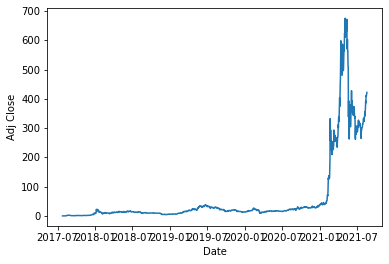

In [10]:
# Visualize dataframe

sns.lineplot(data=df['Adj Close'])

In [11]:
import pandas_ta
# Add EMA to dataframe by appending
# Note: pandas_ta integrates seamlessly into
# our existing dataframe
df.ta.ema(close='Adj Close', length=10, append=True)

Date
2017-07-25           NaN
2017-07-26           NaN
2017-07-27           NaN
2017-07-28           NaN
2017-07-29           NaN
                 ...    
2021-08-13    368.632837
2021-08-14    375.978591
2021-08-15    382.999762
2021-08-16    389.267234
2021-08-17    395.258785
Name: EMA_10, Length: 1481, dtype: float64

In [12]:
# Print the first 10 entries of our data
print(df.head(10))


            Adj Close    EMA_10
Date                           
2017-07-25   0.105870       NaN
2017-07-26   0.105138       NaN
2017-07-27   0.107737       NaN
2017-07-28   0.104067       NaN
2017-07-29   0.107811       NaN
2017-07-30   0.106414       NaN
2017-07-31   0.104250       NaN
2017-08-01   0.099867       NaN
2017-08-02   0.100452       NaN
2017-08-03   0.106642  0.104825


In [13]:
# Drop the first n-rows
df = df.iloc[10:]

In [14]:
df.head(15)

,Adj Close,EMA_10
Date,,
2017-08-04,0.107494,0.105310
2017-08-05,0.128871,0.109594
2017-08-06,0.130999,0.113486
2017-08-07,0.148848,0.119915
2017-08-08,0.224421,0.138916
2017-08-09,0.242912,0.157825
2017-08-10,0.349079,0.192598
2017-08-11,0.392572,0.228957
2017-08-12,0.446365,0.268486


<AxesSubplot:xlabel='Date'>

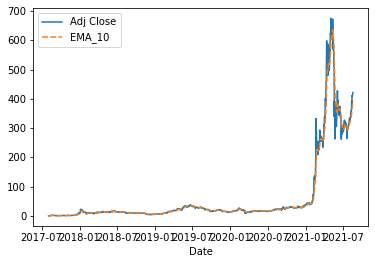

In [15]:
# Visualize dataframe

sns.lineplot(data=df)

In [16]:
# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [17]:
# Test
print(X_test.describe())

        Adj Close
count  295.000000
mean    65.872990
std    126.602335
min      0.130999
25%     10.133100
50%     17.053301
75%     30.477776
max    646.100830


In [18]:
# Training set
print(X_train.describe())

         Adj Close
count  1176.000000
mean     59.330896
std     122.725883
min       0.107494
25%      10.227350
50%      16.422262
75%      28.067123
max     675.684082


In [19]:
np.any(np.isnan(df))

False

In [20]:
np.all(np.isfinite(df))

True

In [21]:
#this handles the infinite values located in the data set
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [22]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.96708268]]
Mean Absolute Error: 4.7218617555260565
Coefficient of Determination: 0.982077364296257


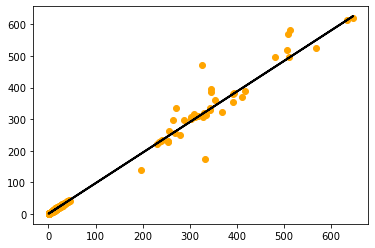

In [24]:
plt.scatter(X_test, y_test,  color='orange')
plt.plot(X_test, y_pred, color='black', linewidth=2)


In [25]:
df.head()

,Adj Close,EMA_10
Date,,
2017-08-04,0.107494,0.105310
2017-08-05,0.128871,0.109594
2017-08-06,0.130999,0.113486
2017-08-07,0.148848,0.119915
2017-08-08,0.224421,0.138916


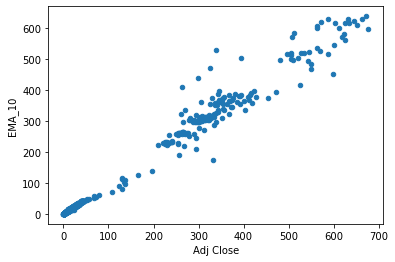

In [26]:
df.plot(kind ='scatter',x='Adj Close',y='EMA_10')
plt.show()

In [27]:
#test train split for supervised training
X_train,X_test,y_train,y_test = train_test_split(df[['Adj Close']], df[['EMA_10']])

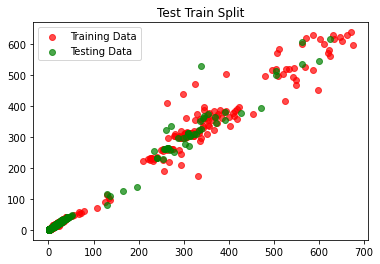

In [28]:
#test train split visualiztion
plt.scatter(X_train,y_train, label='Training Data', color ='red',alpha=.7)
plt.scatter(X_test,y_test, label='Testing Data', color ='green',alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [29]:
#Create Linear model
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

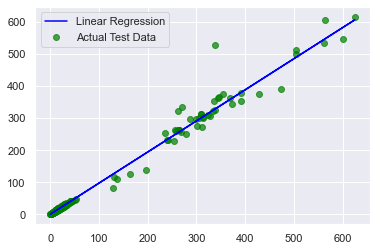

In [41]:
#use model to predic on TEST data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plot prediction line against actual test data
plt.plot(X_test, prediction,label = 'Linear Regression', color='blue')
plt.scatter(X_test, y_test,label = 'Actual Test Data', color='green', alpha =.7)
plt.legend()
plt.show()


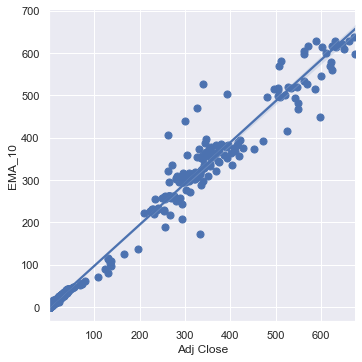

In [39]:
sns.set_theme(color_codes=True)

sns.lmplot(x="Adj Close", y="EMA_10", data=df, x_estimator=np.mean);

In [35]:
#Predicting closing price 
LR.predict(np.array([[350]]))[0]

array([339.69440601])

In [332]:
#Score this model
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.9880235892667998

In [ ]:
# The model score is high this model shows that the Adj Closing value is continuing to grow.
# The goal of this project was to predict a closing price for a specific day.
# Educational purposes was to show various ways to show linear regression as well machine learning skills like training data sets
# EMA was used becuase of Cryptocurrency being a trending market in todays world.
